In [64]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [65]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)
mode  = lumapi.MODE(hide = False)

Exception ignored in: <function Lumerical.__del__ at 0x000001AA48A44550>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v212\api\python\lumapi.py", line 1174, in __del__
    close(self.handle)
  File "C:\Program Files\Lumerical\v212\api\python\lumapi.py", line 244, in close
    iapi.appClose(handle)
ctypes.ArgumentError: argument 1: <class 'TypeError'>: expected Session instance instead of Session


In [66]:
## Silicon Nitride fit
SiN_fit = "Si3N4 (Silicon Nitride) - Phillip - Fit"
mat = mode.copymaterial("Si3N4 (Silicon Nitride) - Phillip")
mode.setmaterial(mat,"tolerance", 0.001)
mode.setmaterial(mat,"max coefficients",10)
mode.setmaterial(mat,"name", SiN_fit)

## Glass fit
glass_palik_fit = "SiO2 (Glass) - Palik - Fit"
mat = mode.copymaterial("SiO2 (Glass) - Palik")
mode.setmaterial(mat,"tolerance", 0.001)
mode.setmaterial(mat,"max coefficients", 6)
mode.setmaterial(mat,"name", glass_palik_fit)

![<caption>](layout.png)

In [67]:
## Definição da geometria
W1 = 2.3e-6;
W2 = 6.4e-6;
W3 = 1.3e-6;

# op 1
L1 = 24.74e-6
L2 = 20.10e-6
L3 = 26.52e-6

h = 300e-9; # Altura do guia

# Materiais
si    = SiN_fit
glass = glass_palik_fit

In [68]:
mode.addrect();
mode.set("name", "in")

mode.addpoly();
mode.set("name", "taper1")

mode.addpoly();
mode.set("name", "box")

mode.addpoly();
mode.set("name", "taper2")

mode.addrect();
mode.set("name", "out")

mode.addeme();

mode.addemeprofile();
mode.addemeindex();

In [69]:
mode.setnamed("in","x min", -20e-6)
mode.setnamed("in","x max", 0)
mode.setnamed("in","y min", 0)
mode.setnamed("in","y max", W1)
mode.setnamed("in","z", 0)
mode.setnamed("in","z span", h)
mode.setnamed("in","material", si)
mode.setnamed("in","name", "in")


vertices_taper1 = np.array([[0,0],[0,W1],[L1,W2],[L1,0]])
mode.setnamed("taper1","vertices", vertices_taper1)
mode.setnamed("taper1","z", 0)
mode.setnamed("taper1","z span", h)
mode.setnamed("taper1","material", si)


vertices_box = np.array([[L1,0],[L1,W2],[L1+L2,W2],[L1+L2,0]])
mode.setnamed("box","vertices", vertices_box)
mode.setnamed("box","z", 0)
mode.setnamed("box","z span", h)
mode.setnamed("box","material", si)

vertices_taper2 = np.array([[L1+L2,0],[L1+L2,W2],[L1+L2+L3,W3],[L1+L2+L3,0]])
mode.setnamed("taper2","vertices", vertices_taper2)
mode.setnamed("taper2","z", 0)
mode.setnamed("taper2","z span", h)
mode.setnamed("taper2","material", si)

mode.setnamed("out","x min", L1+L2+L3)
mode.setnamed("out","x max", L1+L2+L3+20e-6)
mode.setnamed("out","y min", 0)
mode.setnamed("out","y max", W3)
mode.setnamed("out","z", 0)
mode.setnamed("out","z span", h)
mode.setnamed("out","material", si)

In [70]:
mode.setnamed("EME","simulation temperature", 300);
mode.setnamed("EME","solver type", "3D: X Prop");
mode.setnamed("EME","background material", glass)
mode.setnamed("EME","x min", 0)
mode.setnamed("EME","allow custom eigensolver settings", 1)
mode.setnamed("EME","number of cell groups", 3);
mode.setnamed("EME","group spans", np.transpose([L1, L2, L3]) );
mode.setnamed("EME","cells",  np.transpose([19, 1, 19]));
mode.setnamed("EME","subcell method",  np.transpose([1, 0, 1])); # 0 = none,  1 = CVCS
mode.setnamed("EME","modes", np.transpose([15, 15, 15]));
mode.setnamed("EME","display cells", 1)
mode.setnamed("EME","y min", 0 - 15e-6)
mode.setnamed("EME","y max", W2 + 15e-6)
mode.setnamed("EME","z", 0)
mode.setnamed("EME","z span", 8e-6)
mode.setnamed("EME","mesh cells y", 150)
mode.setnamed("EME","mesh cells z", 150)
mode.setnamed("EME","y min bc", "PML");
mode.setnamed("EME","y max bc", "PML");
mode.setnamed("EME","z min bc", "Symmetric");
mode.setnamed("EME","z max bc", "PML");

In [71]:
mode.setnamed("EME::Ports::port_1", "port location", "left");
mode.setnamed("EME::Ports::port_1", "use full simulation span", 0);
mode.setnamed("EME::Ports::port_1", "mode selection", "user select")
mode.setnamed("EME::Ports::port_1", "y", (-mode.getnamed("EME", "y")) + W1/2)
mode.setnamed("EME::Ports::port_1", "y span", 8e-6)
mode.setnamed("EME::Ports::port_1", "z", 0)
mode.setnamed("EME::Ports::port_1", "z span", 8e-6)

mode.setnamed("EME::Ports::port_2", "port location", "right");
mode.setnamed("EME::Ports::port_2", "use full simulation span", 0);
mode.setnamed("EME::Ports::port_2", "mode selection", "user select");
mode.setnamed("EME::Ports::port_2", "y", (-mode.getnamed("EME", "y")) + W3/2)
mode.setnamed("EME::Ports::port_2", "y span", 8e-6)
mode.setnamed("EME::Ports::port_2", "z", 0)
mode.setnamed("EME::Ports::port_2", "z span", 8e-6)

mode.select("EME::Ports::port_1")
mode.updateportmodes(2);
mode.select("EME::Ports::port_2")
mode.updateportmodes(1);

In [72]:
mode.setnamed("monitor","x min", 0)
mode.setnamed("monitor","x max", L1+L2+L3)
mode.setnamed("monitor","y min", 0 - 15e-6)
mode.setnamed("monitor","y max", W2 + 15e-6)
mode.setnamed("monitor","z", 0)

mode.setnamed("monitor_1","x min", 0)
mode.setnamed("monitor_1","x max", L1+L2+L3)
mode.setnamed("monitor_1","y min", 0 - 15e-6)
mode.setnamed("monitor_1","y max", W2 + 15e-6)
mode.setnamed("monitor_1","z", 0)

In [73]:
mode.addmesh()
mode.set('x min', 0)
mode.set('x max', L1)
mode.set('y min', 0)
mode.set('y max', W2)
mode.set('z', 0)
mode.set('z span', h)
mode.set('override x mesh', 0)
mode.set('dy', 0.02e-6)
mode.set('dz', 0.02e-6)

mode.addmesh()
mode.set('x min', L1+L2)
mode.set('x max', L1+L2+L3)
mode.set('y min', 0)
mode.set('y max', W2)
mode.set('z', 0)
mode.set('z span', h)
mode.set('override x mesh', 0)
mode.set('dy', 0.02e-6)
mode.set('dz', 0.02e-6)

{!!}



C:\Program Files\Lumerical\v212\api\python\lumapi.py:127: UserWarning: Multiple objects named '::model::mesh'. Use of this object may give unexpected results.
  warnings.warn(message)


In [74]:
mode.select("EME");
mode.setview("extent");

In [75]:
print("mode_converter_L1-%0.2f_L2-%0.2f_L3-%0.2f_W1-%0.2f_W2-%0.2f_W3-%0.2f" %(1e6*L1, 1e6*L2, 1e6*L3, 1e6*W1, 1e6*W2, 1e6*W3) )

mode_converter_L1-24.74_L2-20.10_L3-26.52_W1-2.30_W2-6.40_W3-1.30


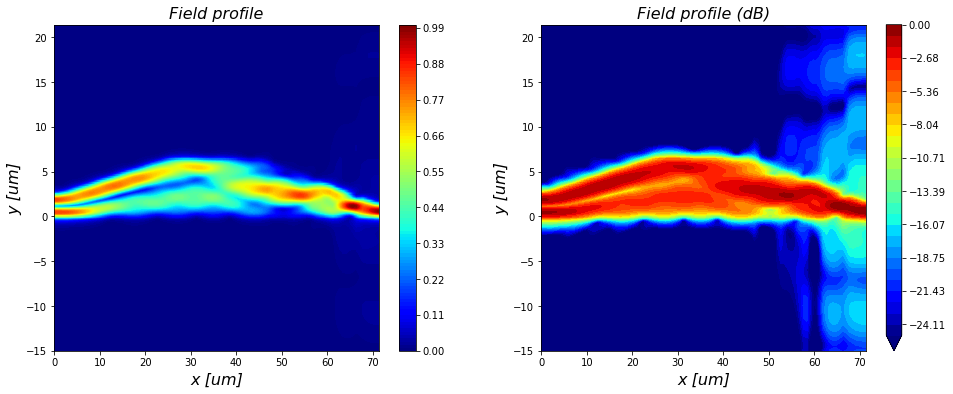

In [76]:
lambd_min = 1.525e-6;
lambd_max = 1.575e-6;
emepoints = 100;
group_delay = 1;

mode.setemeanalysis("wavelength sweep",1);
mode.setemeanalysis("start wavelength", lambd_min);
mode.setemeanalysis("stop wavelength", lambd_max);
mode.setemeanalysis("calculate group delays", group_delay);
mode.setemeanalysis("number of wavelength points", emepoints);
mode.emesweep("wavelength sweep");
mode.emepropagate();

E = mode.getresult("monitor","field profile");
niveis = np.linspace(-25, 0, num = 29);

lambd = E['lambda'];

x = E['x']
x = x[:,0]
y = E['y']
y = y[:,0]
z = E['z']

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max()
logE = 10*np.log10(np.transpose(Emag[:,:,0]))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

img1 = axs[0].contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap);
fig.colorbar(img1, ax=axs[0])
axs[0].set_title('Field profile',fontsize = 16,fontstyle = 'oblique')
axs[0].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
axs[0].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')

img2 = axs[1].contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
fig.colorbar(img2, ax=axs[1])
axs[1].set_title('Field profile (dB)',fontsize = 16,fontstyle = 'oblique')
axs[1].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
axs[1].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')

S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

#axs[0].plot(1e6*lambd, S11, linewidth=2,label = 'S11');
axs[0].plot(1e6*lambd, S21, linewidth=2,label = 'S21');
axs[0].set_xlim(1.525,1.575)
axs[0].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
axs[0].set_ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
axs[0].legend(loc='upper right', fontsize=12.0)
axs[0].grid(True)

#axs[1].plot(1e6*lambd, 10*np.log10(S11), linewidth=2,label = 'S11');
axs[1].plot(1e6*lambd, 10*np.log10(S21), linewidth=2,label = 'S21');
axs[1].set_xlim(1.525,1.575)
axs[1].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
axs[1].set_ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
axs[1].legend(loc='upper right', fontsize=12.0)
axs[1].grid(True)